# Requirements

In [1]:
!pip install -r /kaggle/input/dependency/requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 101.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 88.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 109.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 105.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from wordcloud import WordCloud, STOPWORDS
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import preprocessor as p
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import time
from sklearn.model_selection import GridSearchCV
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


2025-05-24 06:47:55.017525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-24 06:47:55.017598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-24 06:47:55.019346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Understanding

In [5]:
!unzip /content/drive/MyDrive/Capstone/mental-health.zip

Archive:  /content/drive/MyDrive/Capstone/mental-health.zip
replace Combined Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Combined Data.csv       


In [24]:
df = pd.read_csv('/kaggle/input/mental-health/Combined Data.csv')
df.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


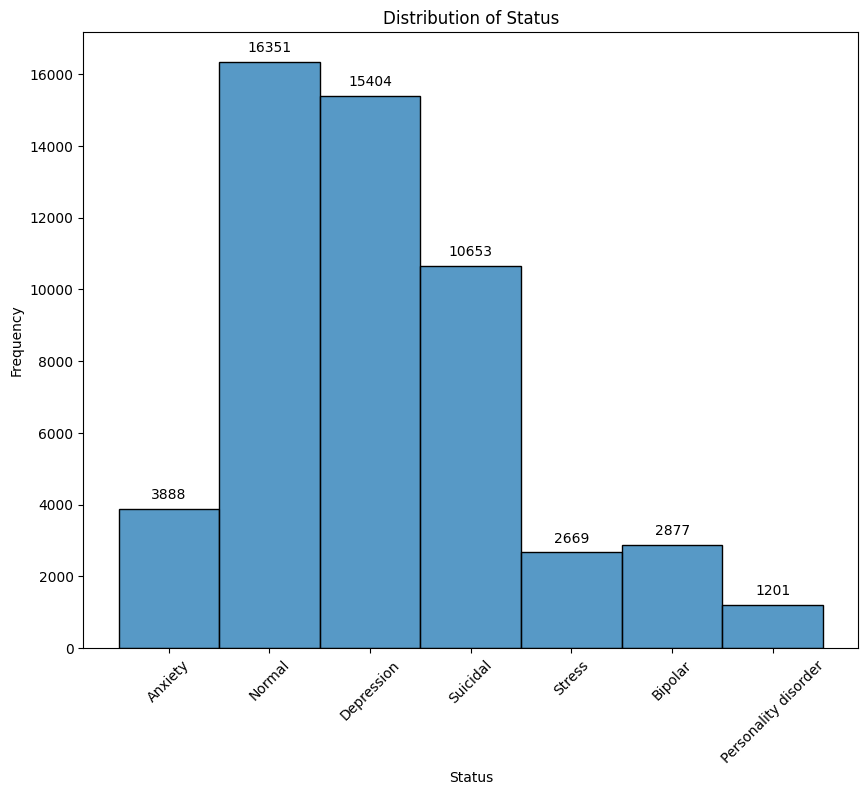

In [7]:
plt.figure(figsize=(10, 8)) # Set the figure size (width=10, height=6)
sns.histplot(df['status'])
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [8]:
df.shape

(53043, 3)

In [25]:
df = df.drop('Unnamed: 0', axis=1)

In [26]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [27]:
df['statement_length'] = df['statement'].fillna('').apply(len)
df[['statement', 'statement_length']].head()

,statement,statement_length
0,oh my gosh,10
1,"trouble sleeping, confused mind, restless hear...",64
2,"All wrong, back off dear, forward doubt. Stay ...",78
3,I've shifted my focus to something else but I'...,61
4,"I'm restless and restless, it's been a month n...",72


In [28]:
df['statement_length'].describe()

count    53043.000000
mean       574.764342
std        844.721094
min          0.000000
25%         77.000000
50%        313.000000
75%        748.000000
max      32759.000000
Name: statement_length, dtype: float64

In [29]:
df[df['statement_length']==0]

,statement,status,statement_length
293,NaN,Anxiety,0
572,NaN,Anxiety,0
595,NaN,Anxiety,0
1539,NaN,Normal,0
2448,NaN,Normal,0
...,...,...,...
52838,NaN,Anxiety,0
52870,NaN,Anxiety,0
52936,NaN,Anxiety,0
53010,NaN,Anxiety,0


In [30]:
df[df['statement_length']==32759]

,statement,status,statement_length
13293,I cannot TAKE IT ANYMORE. I cannot TAKE IT ANY...,Suicidal,32759


In [31]:
df.isnull().sum()

statement           362
status                0
statement_length      0
dtype: int64

# Data Preparation

In [32]:
df.dropna(inplace=True)
df.isnull().sum()

statement           0
status              0
statement_length    0
dtype: int64

In [33]:
Q1 = df['statement_length'].quantile(0.25)

Q3 = df['statement_length'].quantile(0.75)

IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 80.0
Q3: 752.0
IQR: 672.0


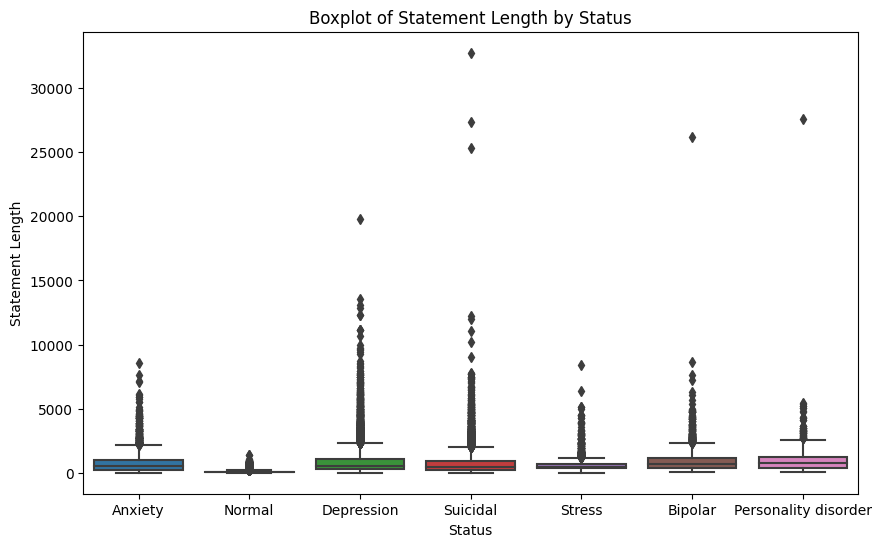

In [34]:
# prompt: boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='statement_length', data=df)
plt.title('Boxplot of Statement Length by Status')
plt.xlabel('Status')
plt.ylabel('Statement Length')
plt.show()

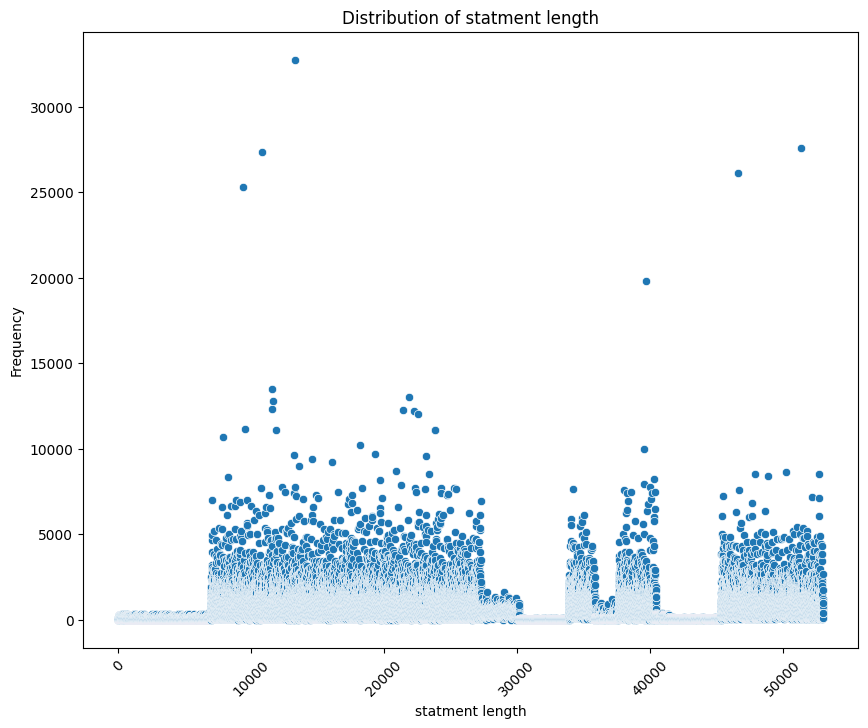

In [35]:
plt.figure(figsize=(10, 8)) # Set the figure size (width=10, height=6)
sns.scatterplot(df['statement_length'])
plt.title('Distribution of statment length')
plt.xlabel('statment length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Lower Bound for Outliers: -928.0
Upper Bound for Outliers: 1760.0
Shape of original dataframe: (52681, 3)
Shape of filtered dataframe (after removing outliers): (49169, 3)


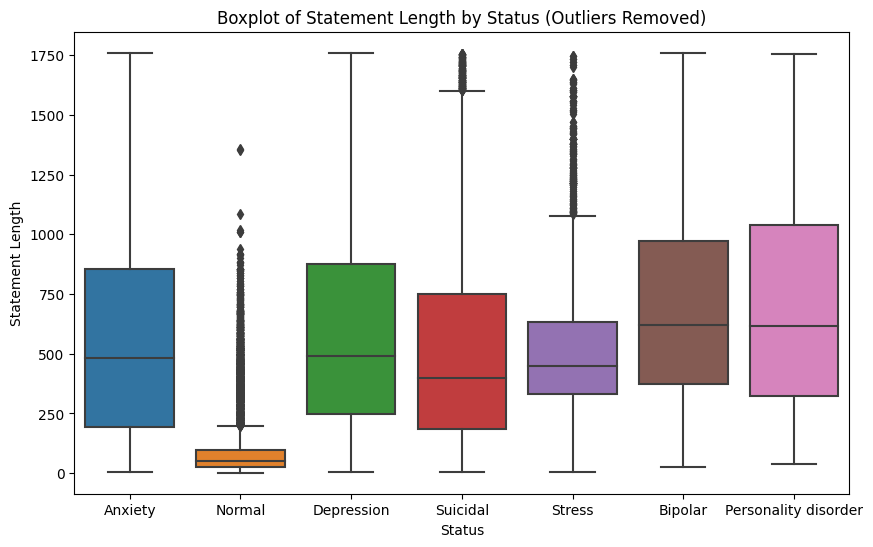

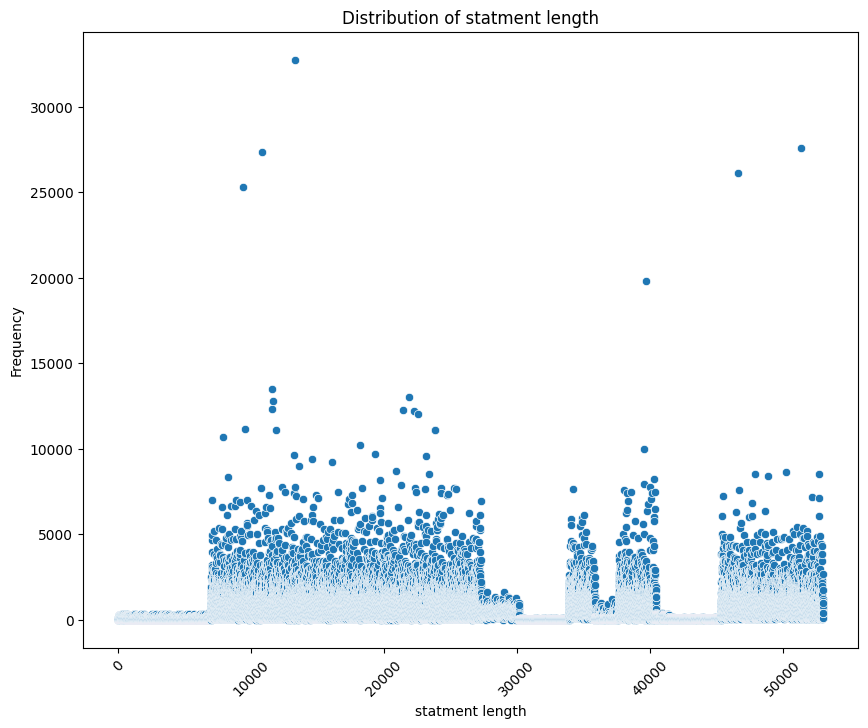

In [36]:

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

df_filtered = df[(df['statement_length'] >= lower_bound) & (df['statement_length'] <= upper_bound)]

print(f"Shape of original dataframe: {df.shape}")
print(f"Shape of filtered dataframe (after removing outliers): {df_filtered.shape}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='statement_length', data=df_filtered)
plt.title('Boxplot of Statement Length by Status (Outliers Removed)')
plt.xlabel('Status')
plt.ylabel('Statement Length')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(df['statement_length'])
plt.title('Distribution of statment length')
plt.xlabel('statment length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

df = df_filtered

In [39]:

# Cek device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# Load model MarianMT English to Indonesian
model_name = "Helsinki-NLP/opus-mt-en-id"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to(device)

# Fungsi translate batch
def translate_batch(texts):
    try:
        inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=256)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        translated = model.generate(**inputs, max_length=256)
        outputs = tokenizer.batch_decode(translated, skip_special_tokens=True)
        return outputs
    except Exception as e:
        print(f"Error translating batch: {e}")
        return texts  # fallback ke teks asli jika gagal

# Siapkan data
statements = df['statement_cleaned'].fillna("").astype(str).tolist()
translated_texts = []
batch_size = 64

# Proses dengan progress bar
for i in tqdm(range(0, len(statements), batch_size), desc="Translating"):
    batch = statements[i:i+batch_size]
    translated_batch = translate_batch(batch)
    translated_texts.extend(translated_batch)

# Simpan hasil ke dataframe
df['statement_translated'] = translated_texts

# Simpan ke file baru
df.to_csv("dataset_translated.csv", index=False)

# Tampilkan hasil
print(df[['statement_cleaned', 'statement_translated']].head())

Using device: cuda


/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Translating: 100%|██████████| 769/769 [1:23:33<00:00,  6.52s/it]


                                   statement_cleaned  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                statement_translated  
0                                         oh my gosh  
1  kesulitan tidur bingung pikiran gelisah hati s...  
2  semua salah mundur sayang ke depan keraguan ti...  
3  Aku telah mengalihkan fokusku ke sesuatu yang ...  
4  Im gelisah dan gelisah sudah sebulan sekarang ...  


# Merge Dataset

In [8]:
df1 = pd.read_csv('/kaggle/input/tambahan/depression-anxiety.csv')
df1.columns = ['statement', 'status','statement_translated']
df1

,statement,status,statement_translated
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...
...,...,...,...
7419,really want kill myselfim questioning long ter...,stress,Benar -benar ingin membunuh diri saya sendiri ...
7420,girlfriend keeps making comments redflagdear r...,anxiety,Pacar terus membuat komentar Redflagdear RSW P...
7421,running optionsmy life general going downhill ...,anxiety,Pilihan berjalan saya kehidupan umum menuruni ...
7422,need support dealing lot stupid shit piling ag...,stress,Butuh dukungan berurusan banyak hal bodoh yang...


In [9]:
df2 = pd.read_csv('/kaggle/input/dataset-cleaned/dataset_cleaned (2).csv')
df_translate = pd.concat([df1,df2], ignore_index=True)
df_translate['status'] = df_translate['status'].str.lower()
df_translate

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,statement,status,statement_translated,statement_length,statement_cleaned,statement_stemming
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...,NaN,NaN,NaN
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...,NaN,NaN,NaN
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...,NaN,NaN,NaN
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...,NaN,NaN,NaN
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...,NaN,NaN,NaN
...,...,...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,784.0,lorazepam side effectafter effect in the last ...,efek samping lorazepam efek samping minggu amb...
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,1012.0,selfishness i dont feel very good its like i d...,egois dunia pikir teman teman bahagia im orang...
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,85.0,is there any way to sleep better i cant sleep ...,tidur tidur obat malam bantu
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,401.0,public speaking tips hi all i have to give a p...,tips bicara publik hi presentasi kerja minggu ...


In [13]:
df_translate[['statement', 'statement_translated', 'statement_cleaned', 'statement_stemming']] = df_translate[['statement', 'statement_translated', 'statement_cleaned', 'statement_stemming']].astype(str)
df_translate

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,statement,status,statement_translated,statement_length,statement_cleaned,statement_stemming
0,advice please hey everyone please help me im ...,stress,Saran tolong hei semuanya tolong bantu saya. S...,NaN,saran tolong hei semuanya tolong bantu saya sa...,nan
1,does anyone get anxious about something and th...,anxiety,Adakah yang cemas tentang sesuatu dan kemudian...,NaN,adakah yang cemas tentang sesuatu dan kemudian...,nan
2,ocd is overwhelming me ocd is overwhelming me ...,anxiety,OCD membanjiri saya OCD\n\nSaya merasa tidak m...,NaN,ocd membanjiri saya ocdsaya merasa tidak mungk...,nan
3,i feel so drained and exhausted i am so tired ...,stress,Saya merasa sangat terkuras dan kelelahan sehi...,NaN,saya merasa sangat terkuras dan kelelahan sehi...,nan
4,social anxiety i have had debilitating social...,anxiety,Kecemasan Sosial Saya telah mengalami kecemasa...,NaN,kecemasan sosial saya telah mengalami kecemasa...,nan
...,...,...,...,...,...,...
56588,Lorazepam side effect/after effect In the last...,anxiety,efek samping lorazepam efek samping minggu men...,784.0,efek samping lorazepam efek samping minggu men...,efek samping lorazepam efek samping minggu amb...
56589,"selfishness ""I don't feel very good, it's lik...",anxiety,keegoisan dunia berpikir teman teman bahagia i...,1012.0,keegoisan dunia berpikir teman teman bahagia i...,egois dunia pikir teman teman bahagia im orang...
56590,Is there any way to sleep better? I can't slee...,anxiety,tidur tidur obat malam membantu,85.0,tidur tidur obat malam membantu,tidur tidur obat malam bantu
56591,"Public speaking tips? Hi, all. I have to give ...",anxiety,tips berbicara publik hi presentasi kerja ming...,401.0,tips berbicara publik hi presentasi kerja ming...,tips bicara publik hi presentasi kerja minggu ...


In [10]:
def clean_text(text):
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'pic.twitter.com\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'-', ' ', text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text.lower()
def remove_stopwords(text, exclude_words=[]):
       # Handle float values
       if isinstance(text, float):
           text = str(text)  # Convert float to string
       tokens = word_tokenize(text.lower())
       filtered_tokens = [token for token in tokens if token not in stopwords.words('indonesian') or token in exclude_words]
       processed_text = ' '.join(filtered_tokens)
       return processed_text

def stemming(text, exclude_words=[]):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = word_tokenize(text)
  stemmed_words = [word if word in exclude_words else stemmer.stem(word) for word in words]
  stemmed_text = " ".join(stemmed_words)
  return stemmed_text

In [14]:
df_translate['statement_cleaned'] = df_translate['statement_translated'].apply(clean_text)
df_translate['statement_cleaned'] = df_translate['statement_cleaned'].apply(remove_stopwords)
df_translate['statement_cleaned'] =df_translate['statement_cleaned'].apply(stemming)
# df_translate.to_csv("dataset_cleaned.csv", index=False)

# SVM

In [ ]:
svm_model = SVC(kernel='rbf',gamma=1.0,C=1.0)
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Akurasi (SVM): {accuracy * 100:.0f}%")
print("\nClassification Report (SVM):\n", classification_report(y_test, svm_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
def test_model(model, vectorizer, test_data):
    test_data_vectorized = vectorizer.transform(test_data)
    predictions = model.predict(test_data_vectorized)
    return predictions

user_input = "kadang kadang pikir cemas takut tutup mata tidur"

# Make prediction
prediction = test_model(clf, vectorizerTFIDF, [user_input])[0]
# Print the prediction
print(f"Prediksi sentimen (SVM): {prediction}")

print(f"teks: {user_input}")

Prediksi sentimen (SVM): Anxiety
teks: kadang kadang pikir cemas takut tutup mata tidur


In [34]:
def test_model(model, vectorizer, test_data):
    test_data_vectorized = vectorizer.transform(test_data)
    predictions = model.predict(test_data_vectorized)
    return predictions

user_input = "kadang kadang pikir cemas takut tutup mata tidur"

# Make prediction
prediction = test_model(svm_model, vectorizerTFIDF, [user_input])[0]
# Print the prediction
print(f"Prediksi sentimen (SVM): {prediction}")

print(f"teks: {user_input}")

Prediksi sentimen (SVM): Anxiety
teks: kadang kadang pikir cemas takut tutup mata tidur


# LSTM

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2025-05-23 05:40:58.508878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747978858.696453      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747978858.749171      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Tokenizer dan padding seperti sebelumnya
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 500  # atau sesuai panjang rata-rata teksmu
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

NameError: name 'Tokenizer' is not defined

In [159]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)

# Konversi ke dictionary
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: 2.009040298278768, 1: 2.865520507029941, 2: 0.5108441558441559, 3: 0.4298061583513626, 4: 7.393796992481203, 5: 2.818097148588623, 6: 0.7251626938038088}


In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build LSTM model
model_lstm = Sequential([
    Input(shape=(max_sequence_length,)),  # definisikan input secara eksplisit
    Embedding(input_dim=5000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False, dropout=0.3)),  # recurrent_dropout optional
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_lstm.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 500, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 747,527 (2.85 MB)

 Trainable params: 747,527 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-5, verbose=1)


history = model_lstm.fit(
    X_train_padded, y_train_encoded,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

Epoch 1/15
983/984 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4473 - loss: 1.5921
Epoch 1: val_accuracy improved from -inf to 0.64370, saving model to best_lstm_model.h5
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4474 - loss: 1.5915 - val_accuracy: 0.6437 - val_loss: 0.8928 - learning_rate: 0.0010
Epoch 2/15
983/984 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6658 - loss: 0.9122
Epoch 2: val_accuracy did not improve from 0.64370
984/984 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6658 - loss: 0.9122 - val_accuracy: 0.6267 - val_loss: 1.0764 - learning_rate: 0.0010
Epoch 3/15
984/984 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7173 - loss: 0.7452
Epoch 3: val_accuracy improved from 0.64370 to 0.69798, saving model to best_lstm_model.h5
984/984 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7173 - loss: 0.7452 - val_accuracy: 0.6980 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 4/15
981/984 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7539 - loss: 

308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7142 - loss: 0.8307
Test Accuracy: 70.96%
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report (LSTM):
                       precision    recall  f1-score   support

             Anxiety       0.69      0.79      0.74       700
             Bipolar       0.63      0.76      0.69       490
          Depression       0.72      0.56      0.63      2750
              Normal       0.88      0.88      0.88      3269
Personality disorder       0.37      0.60      0.46       190
              Stress       0.38      0.70      0.49       498
            Suicidal       0.63      0.60      0.61      1937

            accuracy                           0.71      9834
           macro avg       0.62      0.70      0.64      9834
        weighted avg       0.73      0.71      0.71      9834



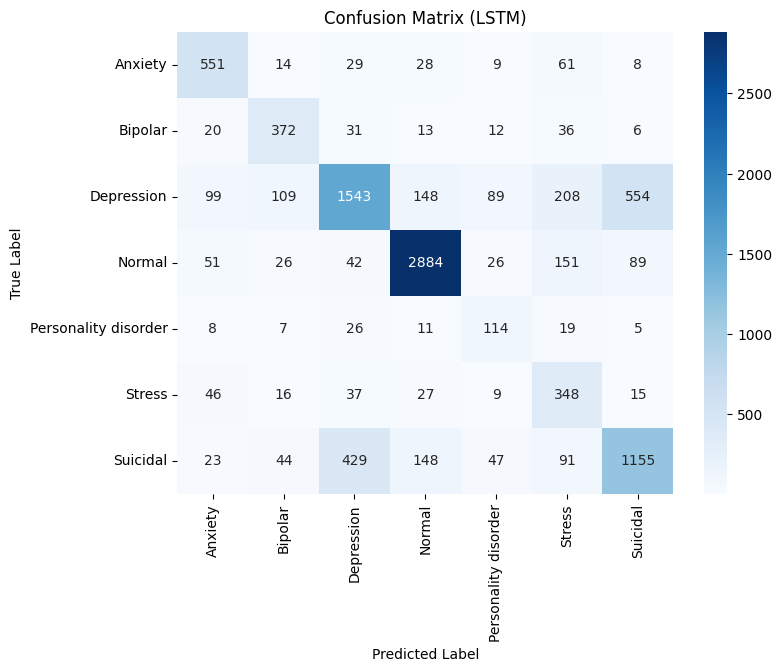

In [162]:
loss, accuracy = model_lstm.evaluate(X_test_padded, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Prediksi dan laporan evaluasi
pred_probs = model_lstm.predict(X_test_padded)
pred_classes = pred_probs.argmax(axis=1)
rnn_predictions = label_encoder.inverse_transform(pred_classes)

# Classification Report
print("\nClassification Report (LSTM):\n", classification_report(y_test, rnn_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, rnn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (LSTM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [165]:

def predict_text(texts):
    """
    Fungsi untuk prediksi kelas dari list teks
    """
    # 1. Tokenisasi dan padding
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_sequence_length)
    
    # 2. Prediksi
    probs = model_lstm.predict(padded)
    
    # 3. Ambil kelas dengan probabilitas tertinggi
    classes = np.argmax(probs, axis=1)
    
    # 4. Decode label asli
    labels = label_encoder.inverse_transform(classes)
    
    # 5. Return label dan confidence
    results = []
    for text, label, prob in zip(texts, labels, probs):
        confidence = np.max(prob) * 100
        results.append((text, label, confidence))
    return results

# Contoh input user
user_texts = [
    "Aku merasa sangat sedih dan gak bisa berhenti nangis.",
    "Kadang aku takut banget sama masa depan.",
    "Aku merasa hidup ini biasa saja, gak ada yang spesial."
]

# Jalankan prediksi
predictions = predict_text(user_texts)

# Cetak hasil prediksi
for text, label, confidence in predictions:
    print(f"Teks: {text}\nPrediksi: {label} ({confidence:.2f}%)\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Teks: Aku merasa sangat sedih dan gak bisa berhenti nangis.
Prediksi: Normal (96.48%)

Teks: Kadang aku takut banget sama masa depan.
Prediksi: Normal (96.08%)

Teks: Aku merasa hidup ini biasa saja, gak ada yang spesial.
Prediksi: Normal (96.49%)

